# Ford Go Bike Trip Dataset Exploration
## by Scholastica Wambui Muigai

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Dataset Overview
My chosen DataSet is showing information that covers over 180K records of individual rides made in a bike-sharing system covering the greater San Francisco Bay area in Feb-2019.

This notebook is mainly aimed to get an overview of the dataset and answer important questions regarding bike trips (No., time, users, .....etc) which will be shown along the notebook via exploratory & explanatory data analysis & visualizations.

Coding will be via python different libraries for data analysis (Pandas, Matplotlib, Seaborn) for data wrangling, cleaning and creating storytelling visualizations.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings 
import warnings
warnings.simplefilter("ignore")

### Loading the Dataset

In [3]:
#loading the ford go bike data
bike = pd.read_csv('fordgobike-tripdata.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#create a copy of the data so we can work with the copy and preserve the original
bike_copy=bike.copy()
bike_copy.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
bike_copy.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#define the shape of the dataset
bike_copy.shape

(183412, 16)

In [8]:
#check the datatypes occuring in the data
bike_copy.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [9]:
#check for duplicated values in the data
bike_copy.duplicated().sum()

0

In [10]:
#check for null values in the data
bike_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Data Cleaning

### Correcting Datatypes

In [11]:
#convert start_station_id,end_station_id and bike_id into strings
bike_copy.start_station_id=bike_copy.start_station_id.astype('str')
bike_copy.end_station_id=bike_copy.end_station_id.astype('str')
bike_copy.bike_id=bike_copy.bike_id.astype('str')

In [13]:
#convert user_type and member_gender into categories
bike_copy.user_type=bike_copy.user_type.astype('category')
bike_copy.member_gender=bike_copy.member_gender.astype('category')

In [12]:
#convert start_time and end_time into datetime
bike_copy.start_time=pd.to_datetime(bike_copy.start_time)
bike_copy.end_time=pd.to_datetime(bike_copy.end_time)

### Dropping missing values

In [13]:
## checking missing values
bike_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [14]:
## droping the missing values
bike_copy = bike_copy.dropna()
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usa

In [15]:
# Create new age column 
bike_copy['member_age'] = 2019 - bike_copy['member_birth_year']
bike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0


In [16]:
# add new columns for trip duration in minute, hour of the day, day of week and month

bike_copy['duration_minute'] = bike_copy['duration_sec']/60
bike_copy['start_date'] = bike_copy.start_time.dt.strftime('%Y-%m-%d')
bike_copy['start_hourofday'] = bike_copy.start_time.dt.strftime('%H')
bike_copy['start_dayofweek'] = bike_copy.start_time.dt.strftime('%A')
bike_copy['start_month'] = bike_copy.start_time.dt.strftime('%B')
bike_copy.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,35.0,869.750000,2019-02-28,17,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,47.0,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,30.0,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45.0,26.416667,2019-02-28,23,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,60.0,29.883333,2019-02-28,23,Thursday,February
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,36.0,19.116667,2019-02-28,23,Thursday,February
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989.0,Male,No,30.0,26.916667,2019-02-28,23,Thursday,February
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988.0,Other,No,31.0,26.166667,2019-02-28,23,Thursday,February
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Subscriber,1992.0,Male,No,27.0,17.483333,2019-02-28,23,Thursday,February
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Subscriber,1996.0,Female,Yes,23.0,7.633333,2019-02-28,23,Thursday,February


### Structure of the dataset

The dataset features areas of trip information, station and member information

### The main feature(s) of interest in the dataset
I would like to explore the bike trips' duration and rental events occurrance patterns and how they relate to the riders' characteristics. Sample questions to answer: When are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?

### Features in the dataset to support my investigation into feature(s) of interest
The features I believe will support my investigation, they are:
* member_birth_year
* member_age
* member_gender
* bike_share_for_all_trip
* start_month
* start_dayofweek
* user_type

## Univariate Exploration



### Looking at Trip Distribution
Checking how the trips are distributed when dealing with time

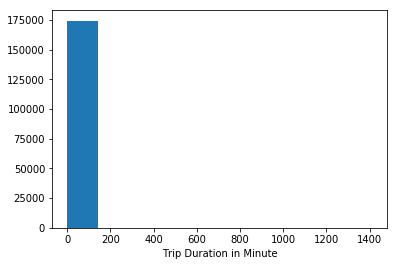

In [17]:
# plotting the trip duration in a minute
plt.hist(data=bike_copy, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

Text(0.5,1,'Trip Distribution by Duration(M)')

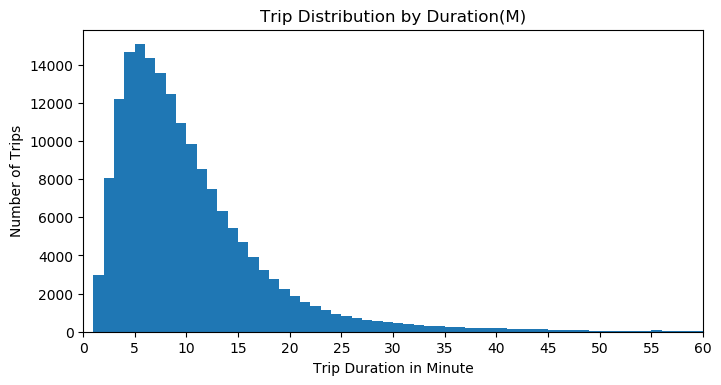

In [18]:
plt.figure(figsize = (8,4), dpi = 100)
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=bike_copy, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute')
plt.xlim(0, 60)
plt.ylabel('Number of Trips')
plt.title("Trip Distribution by Duration(M)")

It looks like most trips were less than 1 hour long with most of them falling between 5 to 10 minutes range.

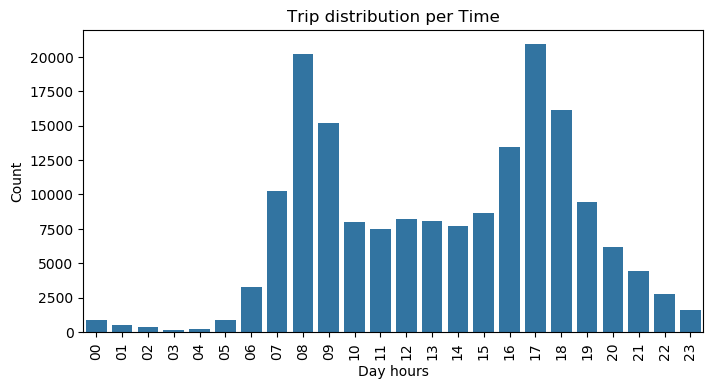

In [57]:
# trip distribution over day hours
plt.figure(figsize = (8,4), dpi = 100)

base_color = sb.color_palette()[0]

hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_categ = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
bike_copy['start_hourofday'] = bike_copy['start_hourofday'].astype(hour_categ)


sb.countplot(data = bike_copy, x = "start_hourofday", color = base_color)
plt.title("Trip distribution per Time")
plt.xlabel('Day hours')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


From the graph we can notice that peak hours are those from 7 - 9 am and from 4 - 6 pm. This might be related to the time when employees and students go to and leave work and school.And the highest distribution around 5 pm suggesting that most of the individuals find that time to be more convinient. We'll look further into that in the bivariate exploration.

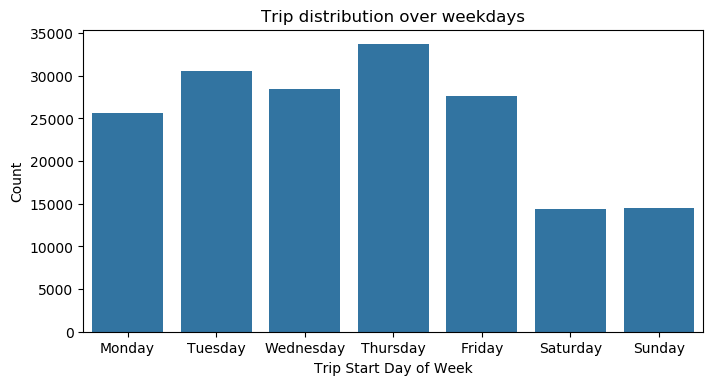

In [20]:
# trip distribution over weekdays
plt.figure(figsize = (8,4), dpi = 100)

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike_copy['start_dayofweek'] = bike_copy['start_dayofweek'].astype(weekday_categ)

sb.countplot(data=bike_copy, x='start_dayofweek', color=base_color)
plt.xlabel('Trip Start Day of Week')
plt.ylabel('Count')
plt.title("Trip distribution over weekdays")

plt.show()

The demand for trips is at peak on Thursday and on the days before it relatively high.It declines onwards to its lowest levels on Saturday and Sundaym maybe due the fact the days weekends.

#### The next several plots are around members/users to see what makes up of the riders.

Text(0.5,1,'User Type Distribution')

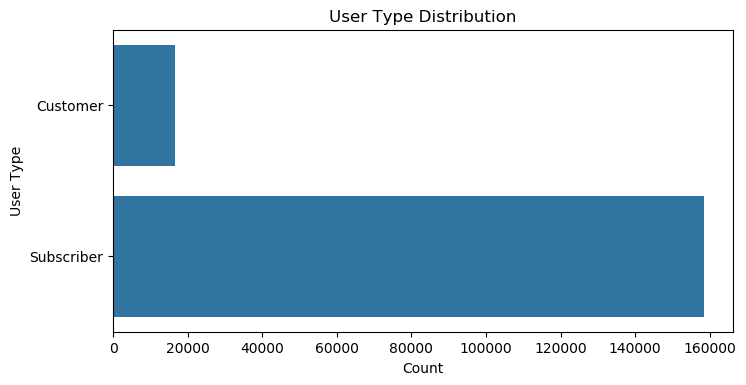

In [67]:
# plottting gender distributions
plt.figure(figsize = (8,4), dpi = 100)
sb.countplot(data=bike_copy, y='user_type', color=base_color);
plt.ylabel('User Type');
plt.xlabel('Count');
plt.title('User Type Distribution')

Text(0.5,1,'Gender Distribution')

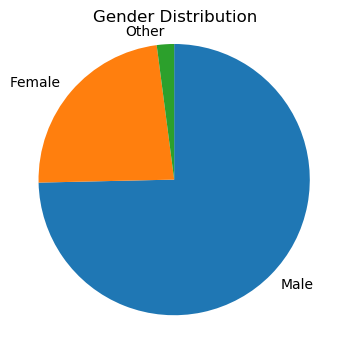

In [71]:
plt.figure(figsize = (8,4), dpi = 100)
sorted_counts = bike2['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')
plt.title('Gender Distribution')

Text(0.5,1,'Distribution of Age')

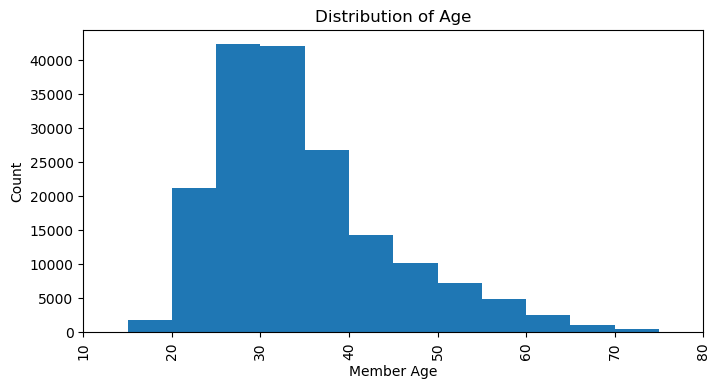

In [24]:
#plotting age distribution
plt.figure(figsize = (8,4), dpi = 100)

bins = np.arange(0, bike_copy['member_age'].max()+5, 5)
plt.hist(data=bike_copy, x='member_age', bins=bins)
plt.xticks(rotation=90)
plt.xlim(10, 80)
plt.xlabel('Member Age')
plt.ylabel('Count')
plt.title("Distribution of Age")

The distribution follows a typical age distribution (Skewed to the right). It is consistent with the distribution of weekdays with those aged 20 - 45 are the most demanding segment for rides as they are the most active population either in work or study.

#### Removing Outliers

In [25]:
bike1 = bike_copy[bike_copy["duration_minute"] <= 60]
bike2 = bike1[bike_copy["member_age"] <= 80]

bike2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45.0,26.416667,2019-02-28,23,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,60.0,29.883333,2019-02-28,23,Thursday,February
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,36.0,19.116667,2019-02-28,23,Thursday,February
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989.0,Male,No,30.0,26.916667,2019-02-28,23,Thursday,February
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988.0,Other,No,31.0,26.166667,2019-02-28,23,Thursday,February


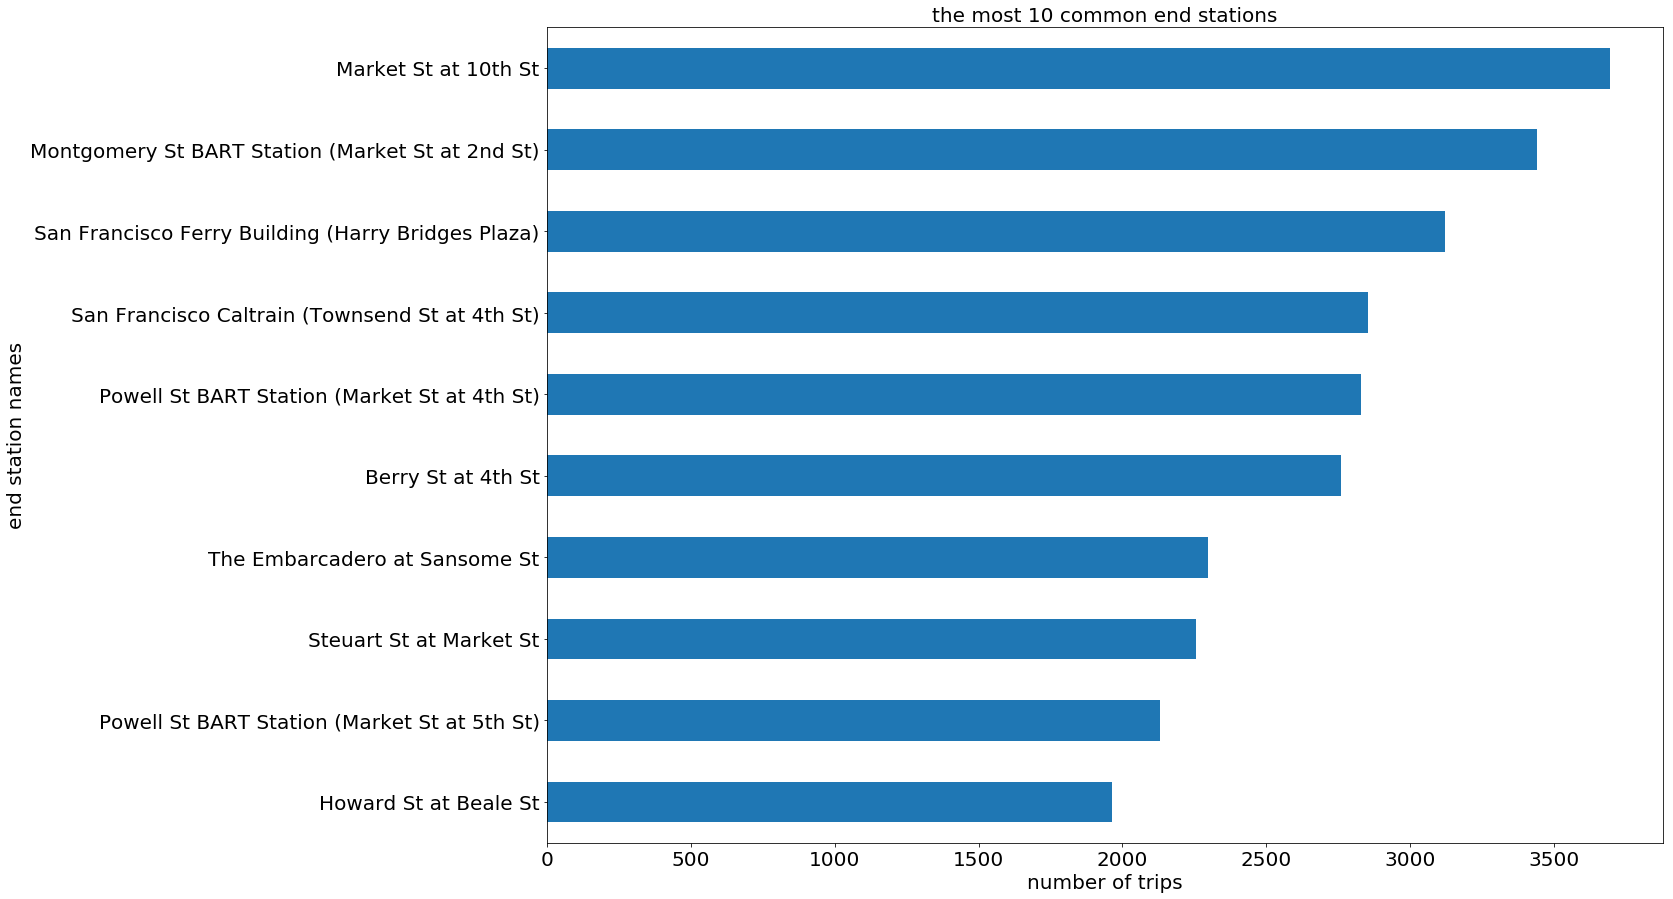

In [26]:
# Bar plot showing the 10 most start stations
bike2['end_station_name'].value_counts()[1:11].sort_values().plot(kind='barh',figsize=[20,15],color=sb.color_palette()[0])
plt.ylabel('end station names',fontsize=20)
plt.xlabel('number of trips',fontsize=20)
plt.title('the most 10 common end stations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

According to observation, Market St is the most common of all the stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. From the distribution of duration we noticed that more than 96 percent of trips were less than 30 minutes. We also noticed that only 0.93 percent of trips are of duration more than 1 hour. These were considered as outliers and were removed before going further in the bivariate analysis.
2. I t is clearly seen that the peak hours are those from 7 - 9 am and from 4 - 6 pm. This might be related to the time when employees and students go to and leave work and school. This is was also consistent with the distribution of trips over weekdays, where work days have the most demand for trips.
3. Age distribution follows any typical age distribution (Skewed to the right). It is consistent with the distribution of weekdays with those aged 20 - 45 are the most demanding segment for rides as they are the most active population either in work or study.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
 The age had some outliers that had to be removed. Also, the trip duration was surprising at first plotting therefore we needed to use describe() and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Trip duration by gender

Text(0.5,1,'Trip duration in relation to Gender')

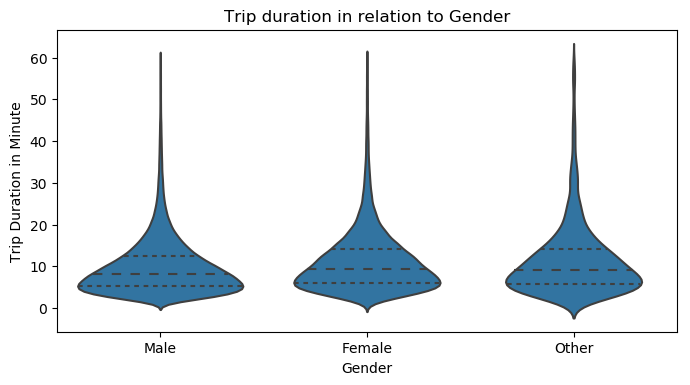

In [27]:
# plotting trip duration against gender
plt.figure(figsize = (8,4), dpi = 100)
sb.violinplot(data=bike2, x='member_gender', y='duration_minute', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Trip Duration in Minute')
plt.title('Trip duration in relation to Gender')

We can see that the Male gender took less time duration compared to female and others. 

#### Trip duration by user type

Text(0.5,1,'Trip duration in relation to User_type')

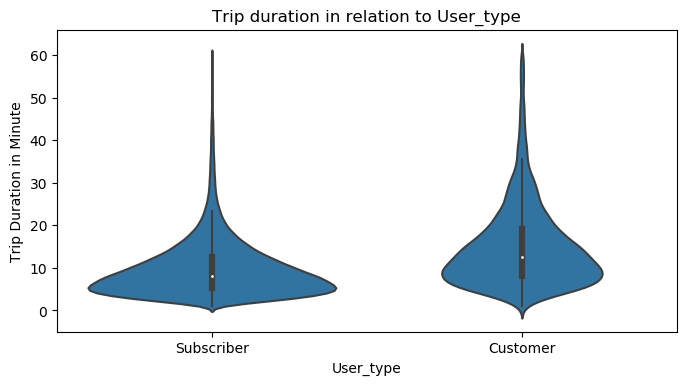

In [74]:
#plotting user type against time duration in minute
plt.figure(figsize = (8,4), dpi = 100)
sb.violinplot(data=bike2, x='user_type', y='duration_minute', color=base_color)
plt.xlabel('User_type')
plt.ylabel('Trip Duration in Minute')
plt.title('Trip duration in relation to User_type')

We observe that the Subscriber took less duration compared to the customer. This is in realtio to median and IQR.

#### Average trip duration in the weekdays

Text(0.5,1,'Average Trip duration in the week')

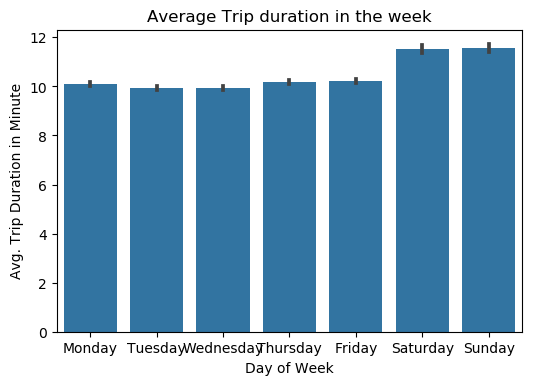

In [60]:
#plotting the average trip duration on all weekdays
plt.figure(figsize = (6,4), dpi = 100)
sb.barplot(data=bike2, x='start_dayofweek', y='duration_minute', color=base_color)
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('Average Trip duration in the week')

In accordance to the plot, during Sunday and Saturday the average trip duration is high.This may be because its on weekends and there is a lot of free time. On weekdays, the duartion is stable.

Text(0.5,1,'Member by age on the week days')

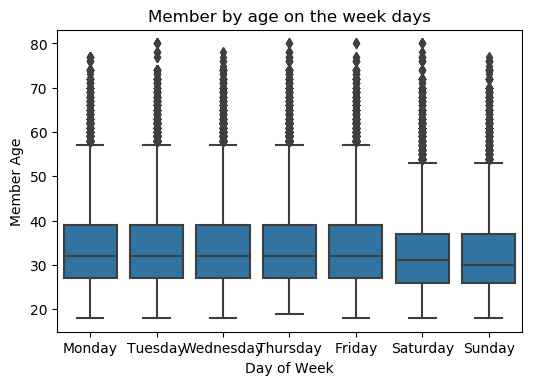

In [73]:
#plotting member by age
plt.figure(figsize = (6,4), dpi = 100)
sb.boxplot(data=bike2, x='start_dayofweek', y='member_age', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');
plt.title('Member by age on the week days')

On the weekends, we observe that the members are slightly younger compared to those riding from Monday to Friday. This may be explained by the fact that most adults drive as they go to and from work

#### Daily usage of bikes by customers and subscribers

Text(0.5,1,'Daily usage of bikes between customers and subscribers')

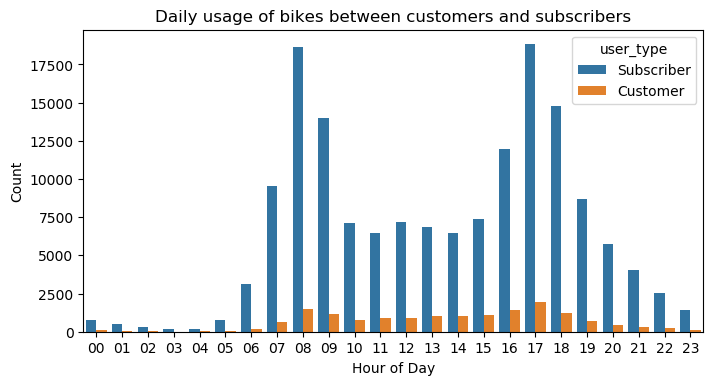

In [79]:
#plotting daily usage of bikes between customers and subscrobers
plt.figure(figsize = (8,4), dpi = 100)
sb.countplot(data=bike2, x='start_hourofday', hue='user_type')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Daily usage of bikes between customers and subscribers')

Subscriber usage is high during rush hours when people go to work in the morning and get off work in the afternoon, double confirmed their usage purpose and goal of riding. 

#### Weekly usage of bikes between customers and subscribers

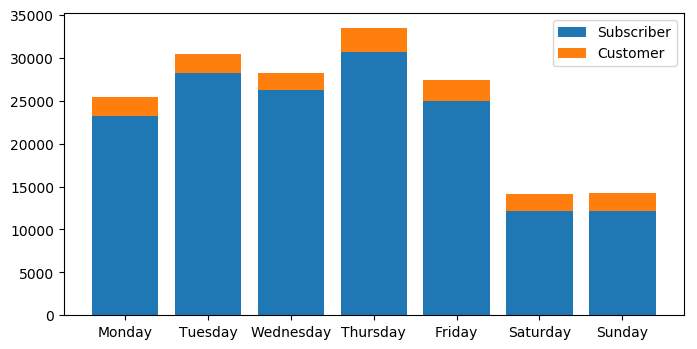

In [84]:
plt.figure(figsize = (8,4), dpi = 100)
start_dayofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
user_type = ['Subscriber', 'Customer']

baselines = np.zeros(len(start_dayofweek))
# for each second-variable category:
for i in range(len(user_type)):
    # isolate the counts of the first category,
    cat2 = user_type[i]
    inner_counts = bike2[bike2['user_type'] == cat2]['start_dayofweek'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(start_dayofweek)), height = inner_counts[start_dayofweek],
            bottom = baselines)
    baselines += inner_counts[start_dayofweek]

plt.xticks(np.arange(len(start_dayofweek)), start_dayofweek)
plt.legend(user_type)

Weekly usage of the subscriber is high on Thursday comapre to other days and that of the customer has sligh differences all around the weeek

Text(0.5,1,'Distribution of Age by user type')

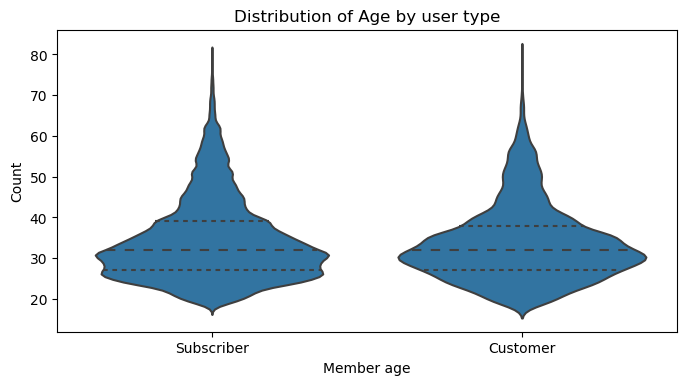

In [64]:
# Distribution of Age
plt.figure(figsize = (8,4), dpi = 100)

sb.violinplot(data=bike2, x = "user_type", y='member_age', color=base_color, inner= 'quartile')
plt.xlabel('Member age')
plt.ylabel('Count')

plt.title("Distribution of Age by user type")


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
According to my exploration that: 
1. On the weekends, we observe that the members are slightly younger compared to those riding from Monday to Friday. This may be explained by the fact that most adults drive as they go to and from work
2. Subscriber usage is high during rush hours when people go to work in the morning and get off work in the afternoon, double confirmed their usage purpose and goal of riding.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It was interest to note that subscribers are slightly older than customers on average but take much shorter/quicker rides.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Trip distribution over weekdays and by customer type

In [55]:

def solution_2():
    day_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        days = pd.api.types.CategoricalDtype(ordered = True, categories = day_of_the_week)
        bike2['start_dayofweek'] = bike2['start_dayofweek'].astype(days)
    else: # compatibility for v.20
        bike2['start_dayofweek'] = bike2['start_dayofweek'].astype('category', ordered = True, categories = dayof_the_week)
        bike2_sub = bike2.loc[bike2['user_type'].isin(['Subscriber', 'Customer'])]
    # plotting
    sb.boxplot(data = bike2, x = 'start_dayofweek', y = 'duration_minute', hue = 'user_type')
    plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
    plt.xticks(rotation = 15)
    

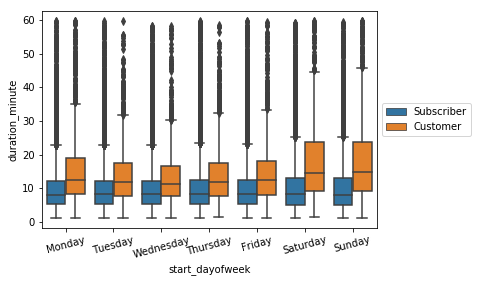

In [56]:
solution_2()

We observe from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. 

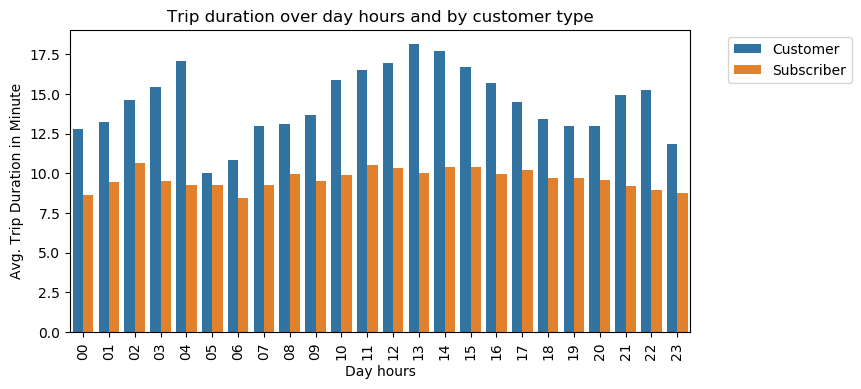

In [61]:
plt.figure(figsize = (8,4), dpi = 100)

sb.barplot(data = bike2, x = "start_hourofday", y = "duration_minute",   hue='user_type', ci = None)
plt.title("Trip duration over day hours and by customer type")
plt.xlabel('Day hours')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

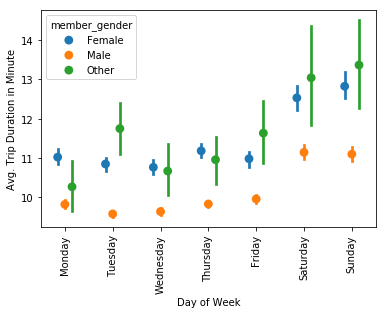

In [69]:
sb.pointplot(data=bike2, x='start_dayofweek', y='duration_minute', hue='member_gender', dodge=0.3, linestyles="");
plt.xticks(rotation = 90)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

I observe that males take shot time duration and there relationship is mutual.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The heatmaps shows clearly very different usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined.

### Were there any interesting or surprising interactions between features?
The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed.

## Conclusions

#### My main findings were:
1. Most of the users are subscribed in this system (the number of subscribers are more than 9 times greater then those of customers)
2. The number of rides decreases greatly during the weekends (saterday and sunday) compared to the number of rides during the rest of days in the week.
3. The average trip duration during weekends (saturday and sunday) is longer than that during the rest of week the male users have the least trip duration in general , the average trip duration for all genders increased at hte weekend (saterday and sunday) which can be explained that the trips during the weekends are for entertainment where no need to hurry.
4. The subscribers users have the least trip duration in general , the average trip duration for both subscribers and customers increased at the weekend (saterday and sunday) especially the customers which can be explained that the trips during the weekends are for entertainment where no need to hurry
5. More than 90% of the trips are below 20 minutes.
